In [3]:
# import Libraries
import pandas as pd
import numpy as np
import os

#1.If you haven’t done so already, complete the instructions in the Exercise for creating the “price_label” and “busiest_day” columns.

### Done.

In [4]:
path=r"C:\Users\abdul\Career-Foundry-Assignment4-Instacart-Basket-Analysis"

In [5]:
orders_products_merged=pd.read_pickle(os.path.join(path, '02_Data','Prepared-Data','orders_products_merged.pkl'))

In [6]:
orders_products_merged.head()

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id eval_set  order_number  \
0             0             0   2539329        1    prior             1   
1             1             1   2398795        1    prior             2   
2             2             2    473747        1    prior             3   
3             3             3   2254736        1    prior             4   
4             4             4    431534        1    prior             5   

   order_dow  order_hour_of_day  days_since_prior_order  product_id  \
0          2                  8                     7.0         196   
1          3                  7                    15.0         196   
2          3                 12                    21.0         196   
3          4                  7                    29.0         196   
4          4                 15                    28.0         196   

   add_to_cart_order  reordered  Unnamed: 0_y product_name  aisle_id  \
0                  1          0           195         Soda        77   
1                  1          1           195         Soda        77   
2                  1          1           195         Soda        77   
3                  1          1           195         Soda        77   
4                  1          1           195         Soda        77   

   department_id  prices _merge  
0              7     9.0   both  
1              7     9.0   both  
2              7     9.0   both  
3              7     9.0   both  
4              7     9.0   both

In [7]:
orders_products_merged=orders_products_merged.drop(columns=['_merge'])

#2.Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [8]:
orders_products_merged['order_dow'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_dow, dtype: int64

In [9]:
result=[]
for value in orders_products_merged['order_dow']:
    if value==0 or value==1:
        result.append('Busiest Days')
    elif value==3 or value==4:
        result.append('Least Busy Days')
    else:
        result.append('Regularly Busy Days')

In [10]:
result

['Regularly Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Regularly Busy Days',
 'Busiest Days',
 'Busiest Days',
 'Busiest Days',
 'Least Busy Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Busiest Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Busiest Days',
 'Busiest Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Least Busy Days',
 'Regularly Busy Days',
 'Least Busy Days',
 'Busiest Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Least Busy Days',
 'Least Busy Days',
 'Regularly Busy Days',
 'Regularly Busy Days',
 'Busiest Days',
 'Busiest Days',
 'Regularly Busy Days',
 'Busiest Day

In [11]:
orders_products_merged['Busiest days']=result

In [12]:
orders_products_merged.tail()

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id eval_set  \
32404854       3360493       3360493   1320836   202557    prior   
32404855       3360494       3360494     31526   202557    prior   
32404856       3376038       3376038    758936   203436    prior   
32404857       3376039       3376039   2745165   203436    prior   
32404858       3408036       3408036   3093936   205420    prior   

          order_number  order_dow  order_hour_of_day  days_since_prior_order  \
32404854            17          2                 15                     1.0   
32404855            18          5                 11                     3.0   
32404856             1          2                  7                     7.0   
32404857             2          3                  5                    15.0   
32404858             1          4                 14                     7.0   

          product_id  add_to_cart_order  reordered  Unnamed: 0_y  \
32404854       43553                  2          1         43557   
32404855       43553                  2          1         43557   
32404856       42338                  4          0         42342   
32404857       42338                 16          1         42342   
32404858       28818                  8          0         28820   

                           product_name  aisle_id  department_id  prices  \
32404854            Orange Energy Shots        64              7     3.7   
32404855            Orange Energy Shots        64              7     3.7   
32404856          Zucchini Chips, Pesto        50             19     6.9   
32404857          Zucchini Chips, Pesto        50             19     6.9   
32404858  Hot Oatmeal Multigrain Raisin       130             14    10.3   

                 Busiest days  
32404854  Regularly Busy Days  
32404855  Regularly Busy Days  
32404856  Regularly Busy Days  
32404857      Least Busy Days  
32404858      Least Busy Days

#3.Check the values of this new column for accuracy. Note any observations in markdown format.

In [13]:
orders_products_merged['Busiest days'].value_counts()

Regularly Busy Days    12916111
Busiest Days           11864412
Least Busy Days         7624336
Name: Busiest days, dtype: int64

#4.When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [29]:
orders_products_merged['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<AxesSubplot:>

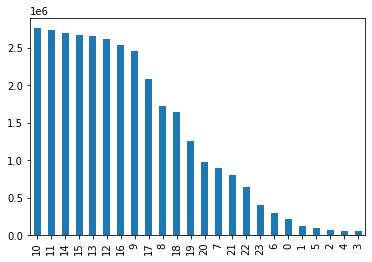

In [31]:
orders_products_merged['order_hour_of_day'].value_counts().plot.bar()

### The above graph suggest that 0-6 hours are the 'least orders' , 9-16 hours are the 'Most Orders' and Remaining are the 'Average Orders'

In [25]:
result2=[]
for value in orders_products_merged['order_hour_of_day']:
    if value>=9 and value<=16:
        result2.append('Most Orders')
    elif value>=0 and value<=6:
        result2.append('Least Orders')
    else:
        result2.append('Average Orders')

In [26]:
orders_products_merged['busiest_period_of_day']=result2

In [27]:
orders_products_merged.head(5)

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id eval_set  order_number  \
0             0             0   2539329        1    prior             1   
1             1             1   2398795        1    prior             2   
2             2             2    473747        1    prior             3   
3             3             3   2254736        1    prior             4   
4             4             4    431534        1    prior             5   

   order_dow  order_hour_of_day  days_since_prior_order  product_id  \
0          2                  8                     7.0         196   
1          3                  7                    15.0         196   
2          3                 12                    21.0         196   
3          4                  7                    29.0         196   
4          4                 15                    28.0         196   

   add_to_cart_order  reordered  Unnamed: 0_y product_name  aisle_id  \
0                  1          0           195         Soda        77   
1                  1          1           195         Soda        77   
2                  1          1           195         Soda        77   
3                  1          1           195         Soda        77   
4                  1          1           195         Soda        77   

   department_id  prices         Busiest days busiest_period_of_day  
0              7     9.0  Regularly Busy Days        Average Orders  
1              7     9.0      Least Busy Days        Average Orders  
2              7     9.0      Least Busy Days           Most Orders  
3              7     9.0      Least Busy Days        Average Orders  
4              7     9.0      Least Busy Days           Most Orders

#5.Print the frequency for this new column.

In [28]:
orders_products_merged['busiest_period_of_day'].value_counts()

Most Orders       21118071
Average Orders    10399967
Least Orders        886821
Name: busiest_period_of_day, dtype: int64

#6.Ensure your notebook is clean and structured and that your code is well commented.

#### Done

#7. Export your dataframe as a pickle file (since you added new columns) and store it correctly in your “Prepared Data” folder.

In [32]:
orders_products_merged.to_pickle(os.path.join(path,'02_Data','Prepared-Data','orders_products_merged_updated.pkl' ))

#8.Save your notebook and submit it to your tutor for review.

#### Done